In [24]:
!pip install gspread matplotlib oauth2client
!pip install python-pptx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 18.3 MB/s eta 0:00:00


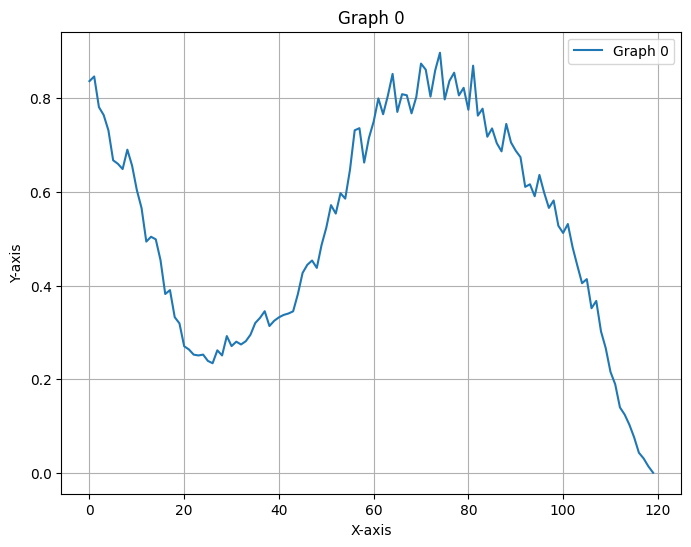

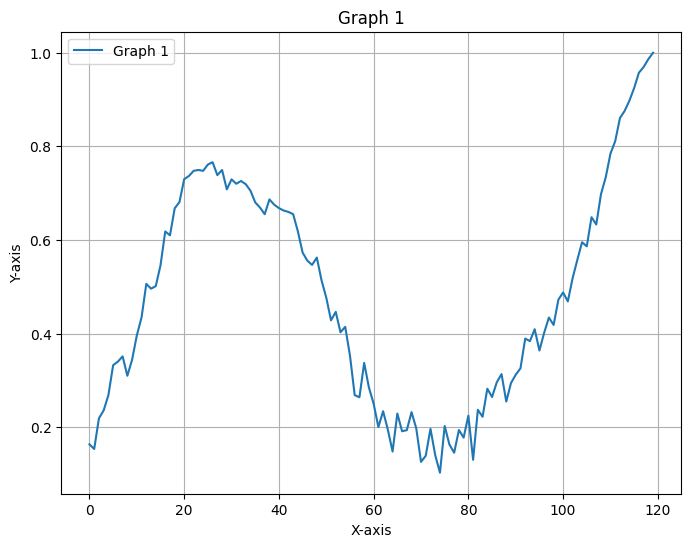

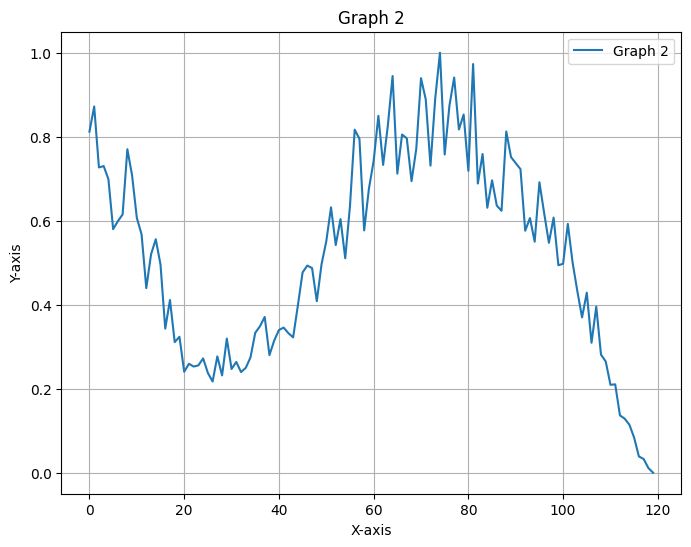

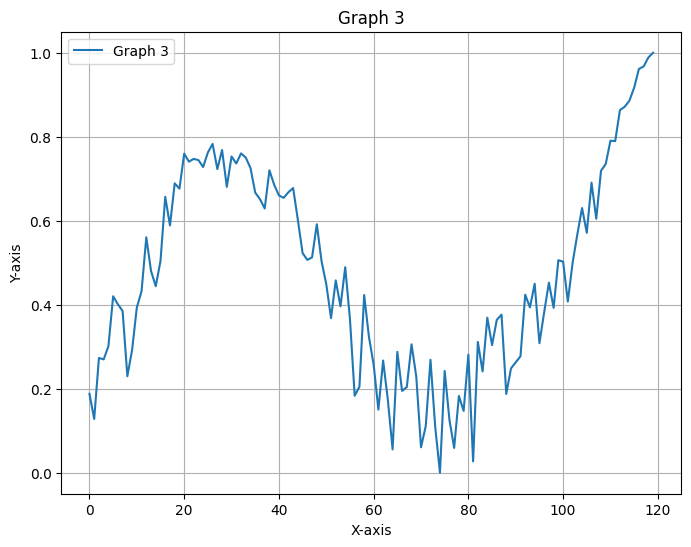

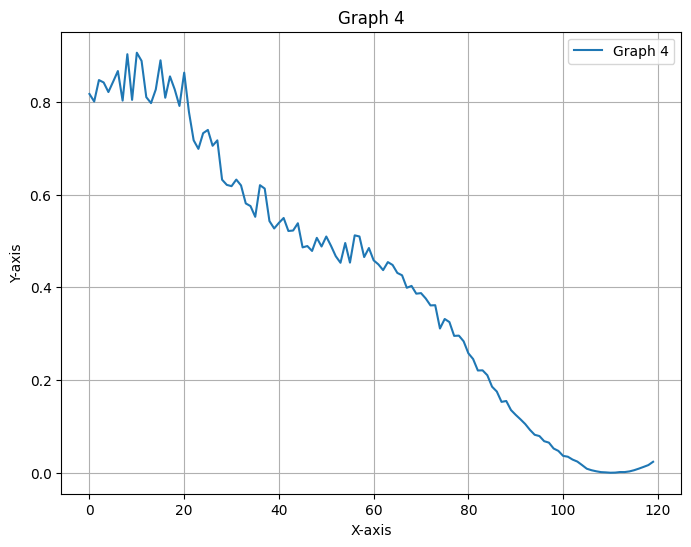

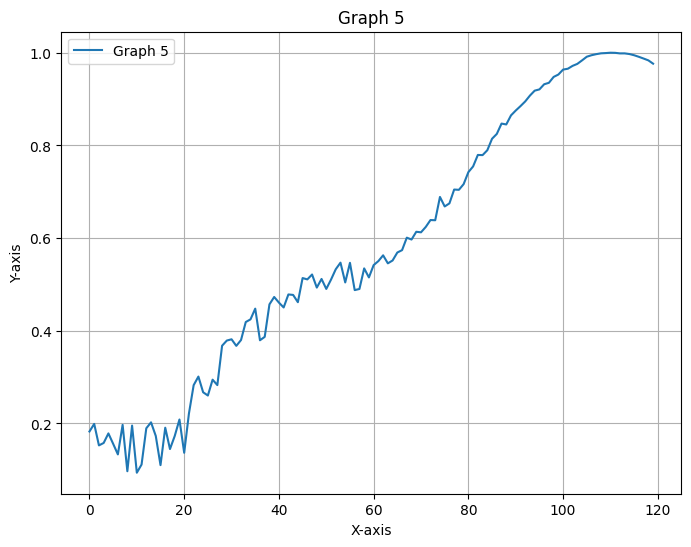

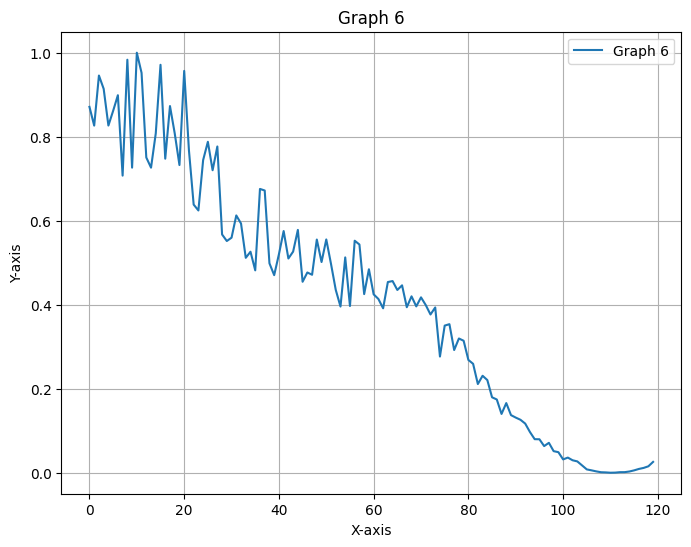

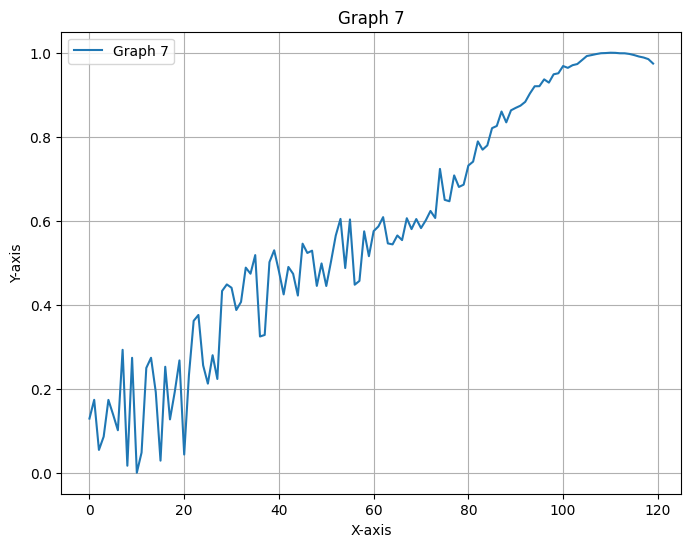

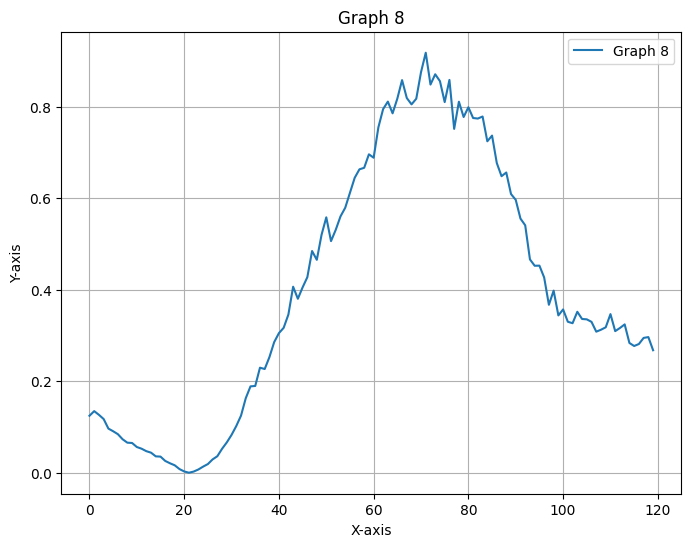

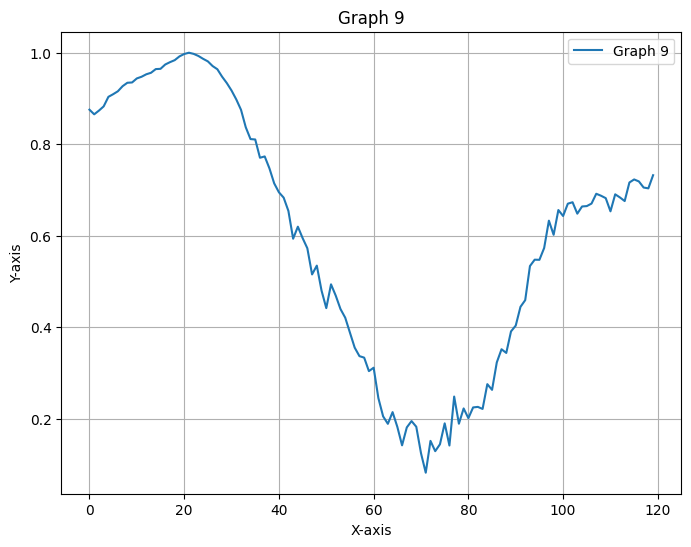

[0.5221472047105833, 0.4778527952894166, 0.5221472047105836, 0.4778527952894163, 0.4204065072514477, 0.5795934927485523, 0.4204065072514479, 0.5795934927485521, 0.3990808395543662, 0.6009191604456338]


In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
with open('exp1-stimuli.json', 'r') as file:
    data = json.load(file)
averages = []
for i in range(10):
    element = data[i]
    x_values = [point['x'] for point in element['data']]
    y_values = [point['y'] for point in element['data']]
    mean_y = np.mean(y_values)
    averages.append(mean_y)
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label=f'Graph {i}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Graph {i}')
    plt.legend()
    plt.grid(True)
    plt.show()
print(averages)

In [ ]:
#averages = [0.5221472047105833, 0.4778527952894166, 0.5221472047105836, 0.4778527952894163, 0.4204065072514477, 0.5795934927485523, 0.4204065072514479, 0.5795934927485521, 0.3990808395543662, 0.6009191604456338]

In [7]:
from google.colab import auth
import gspread
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [19]:
with open('exp1-stimuli.json', 'r') as file:
    graph_data = json.load(file)
true_means = [np.mean([point['y'] for point in graph_data[i]['data']]) for i in range(7)]



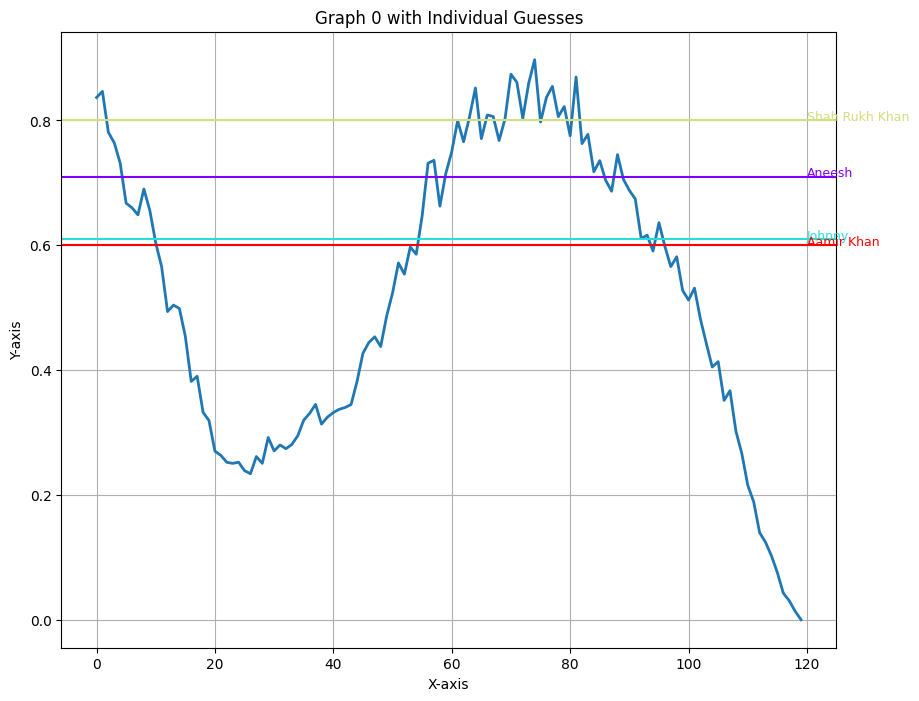

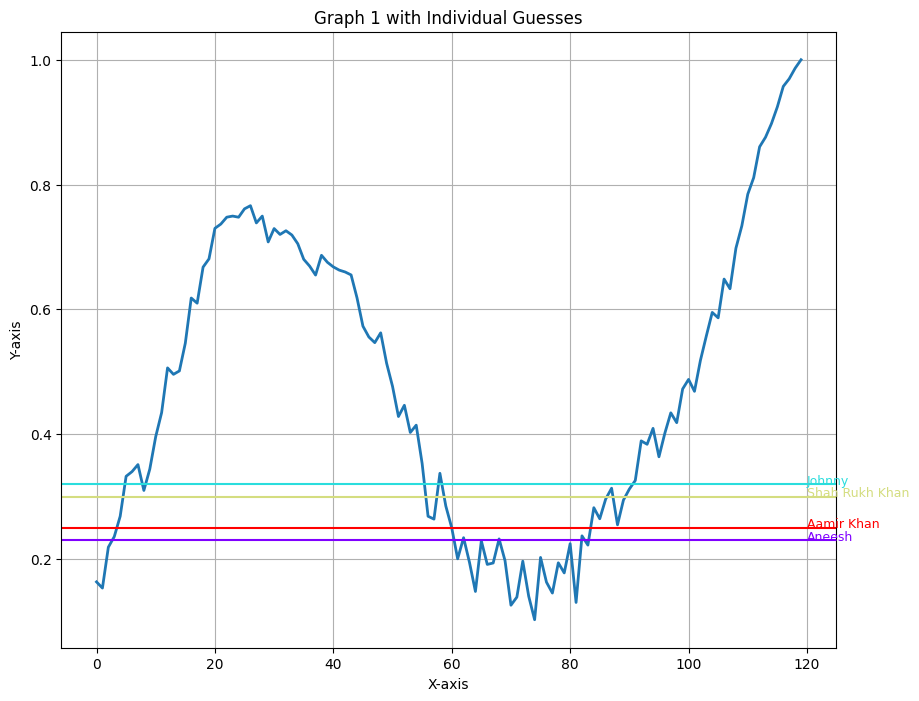

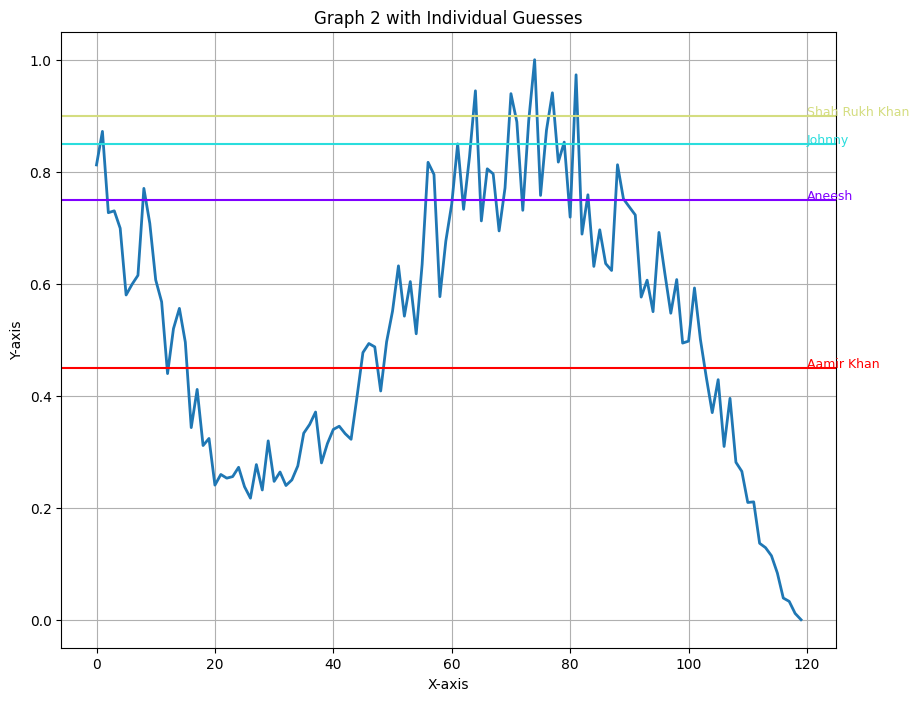

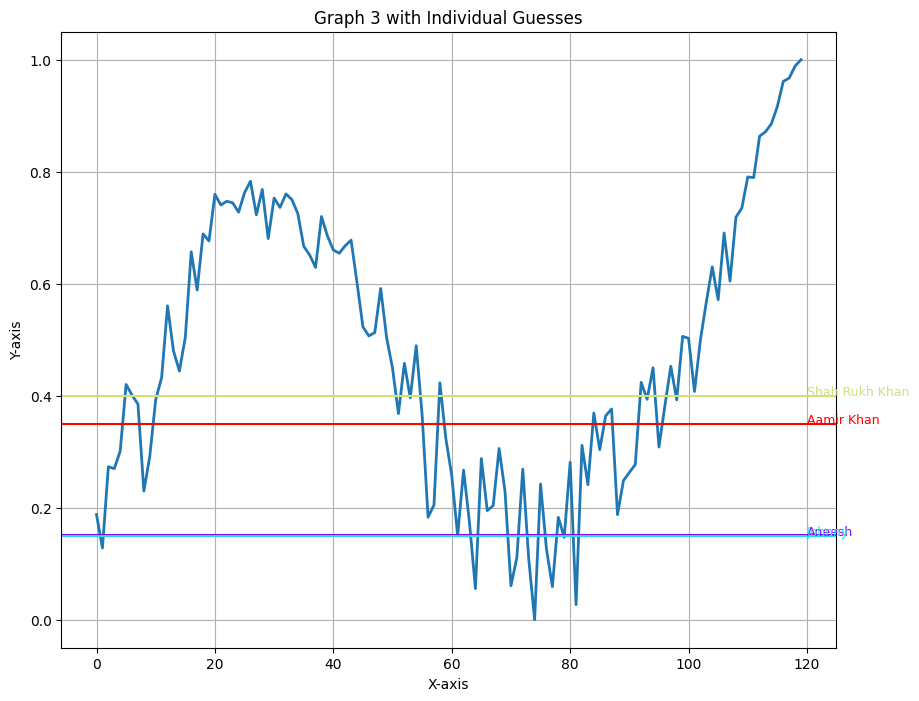

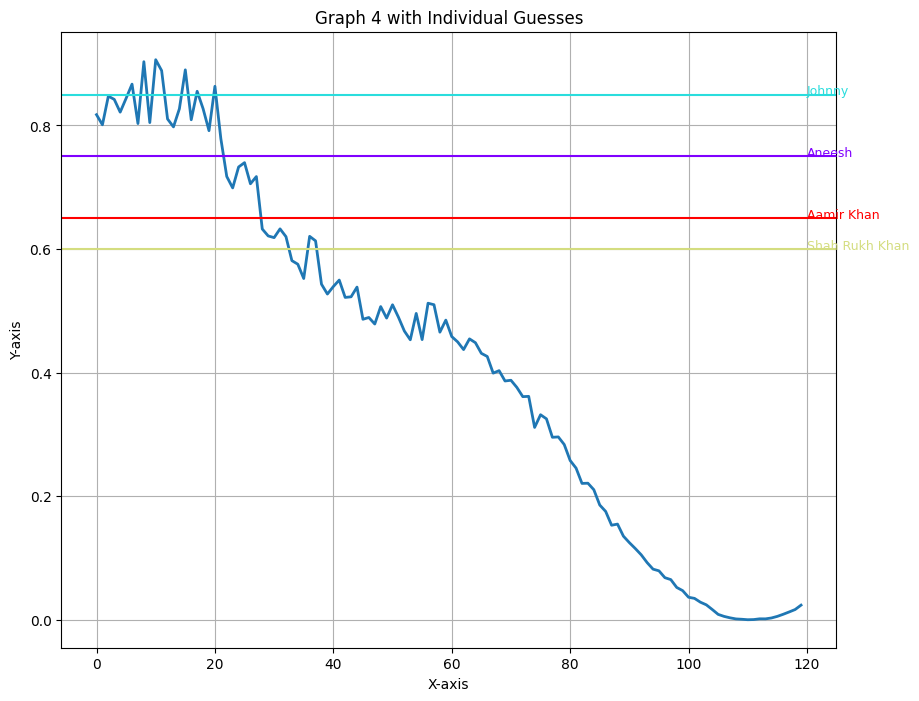

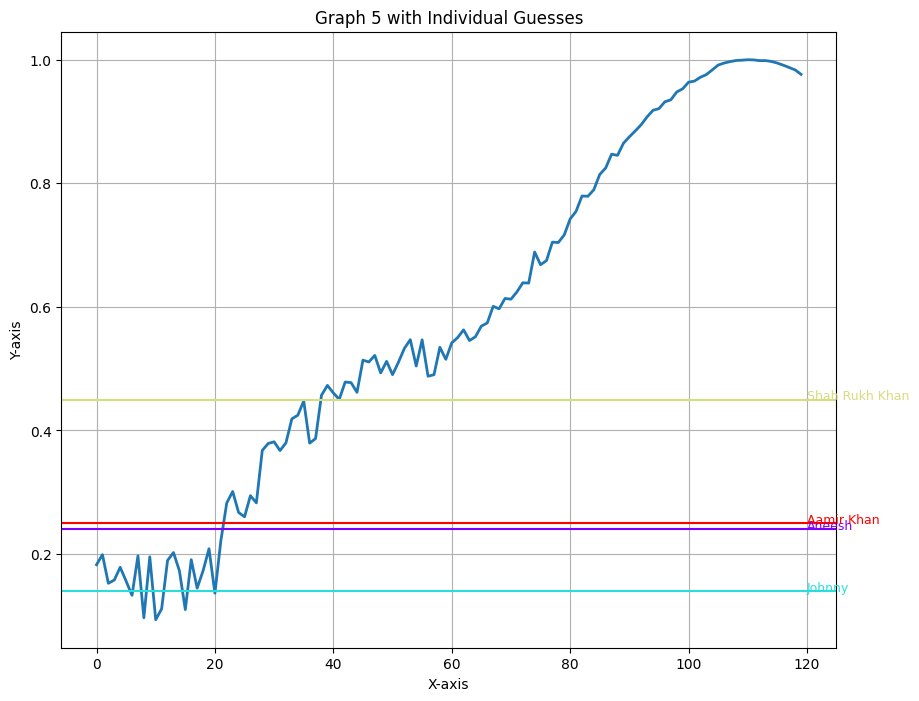

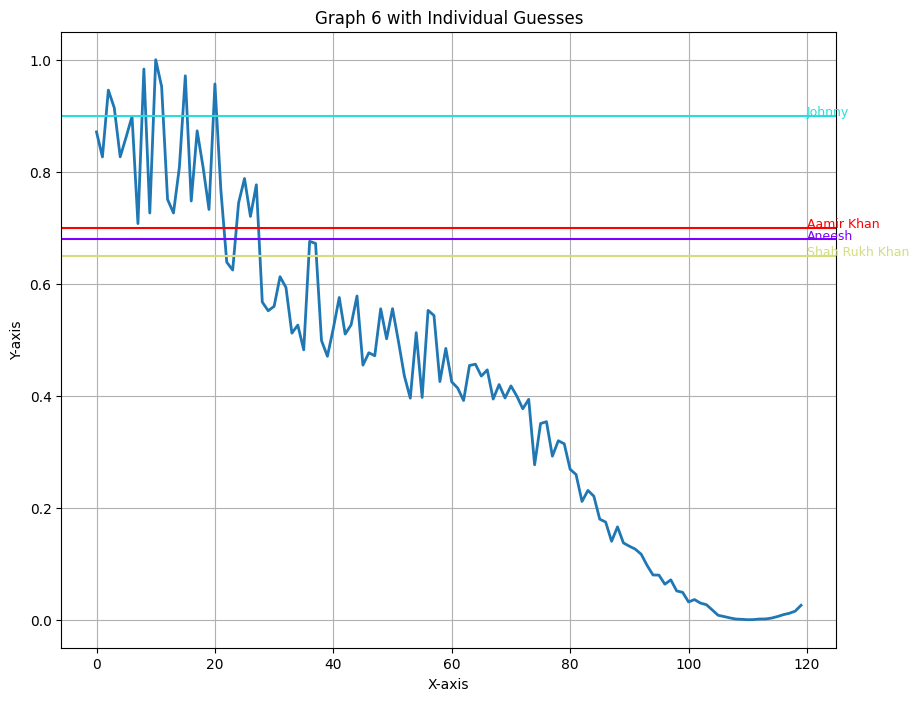

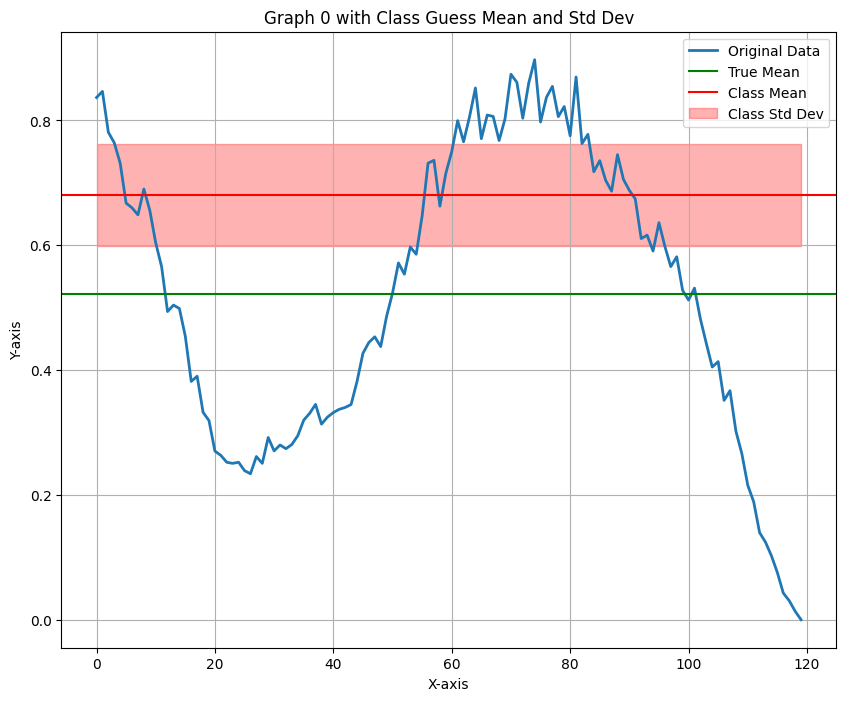

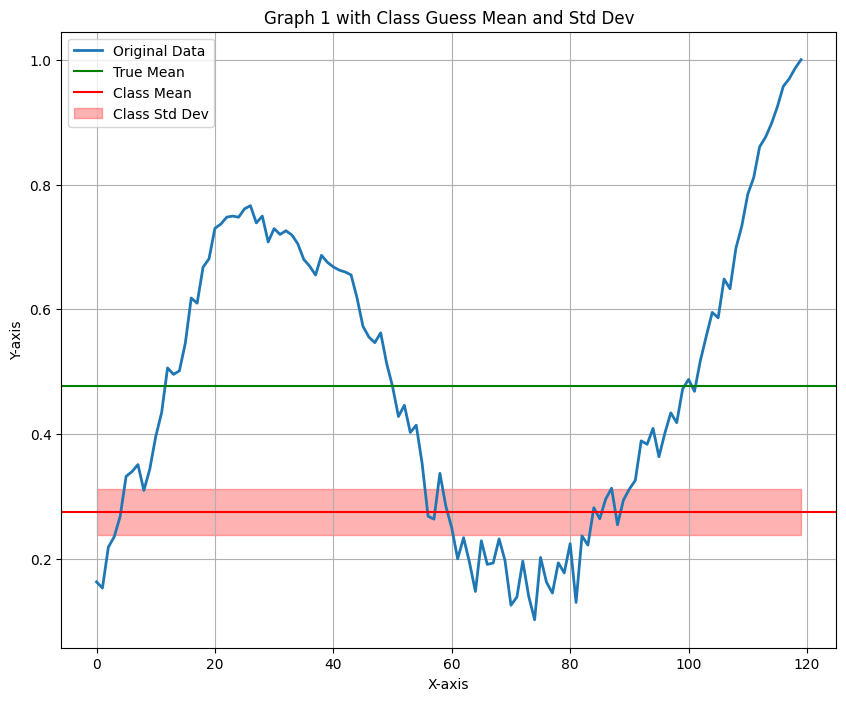

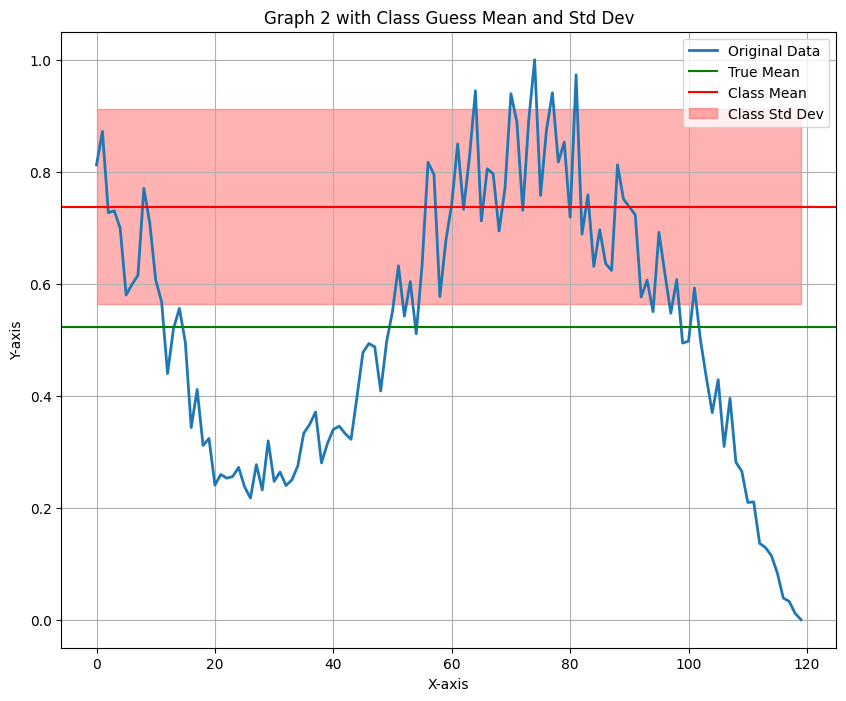

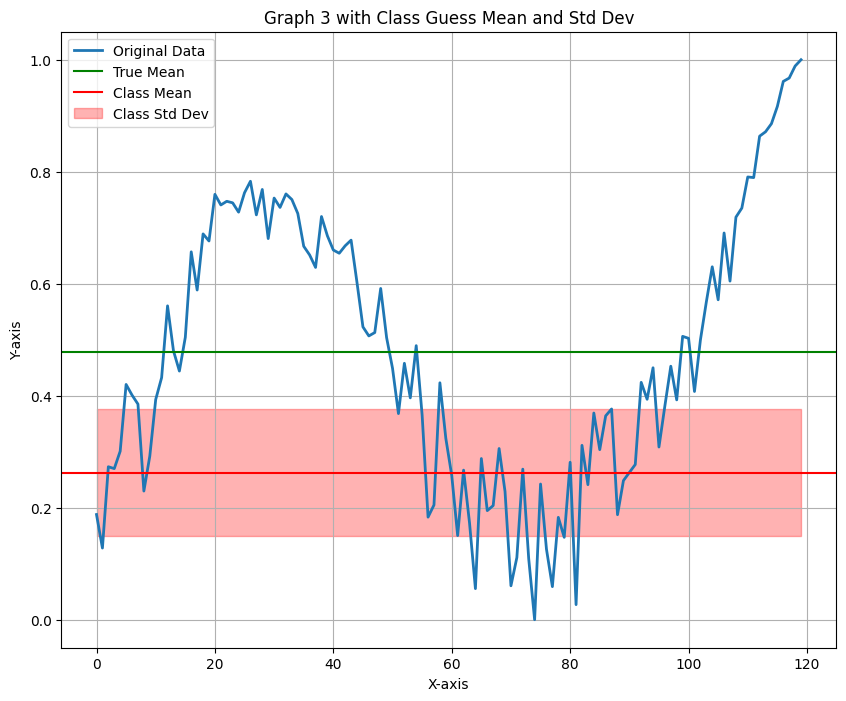

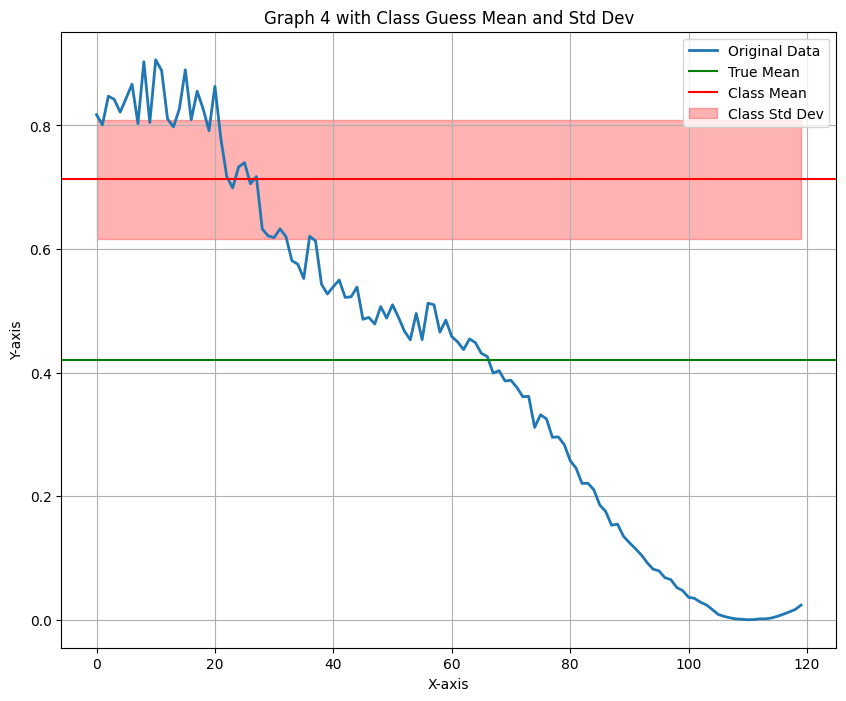

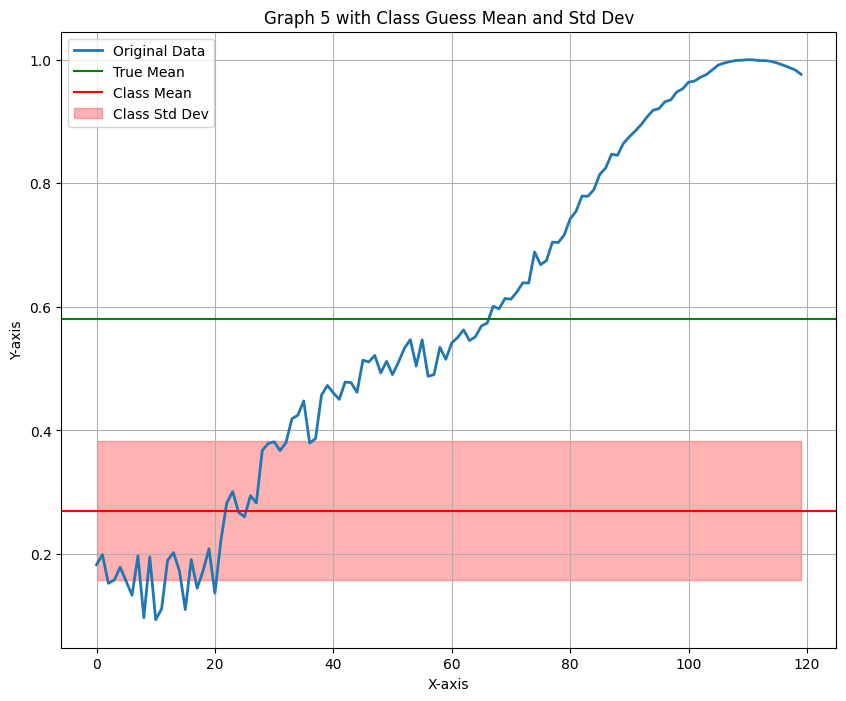

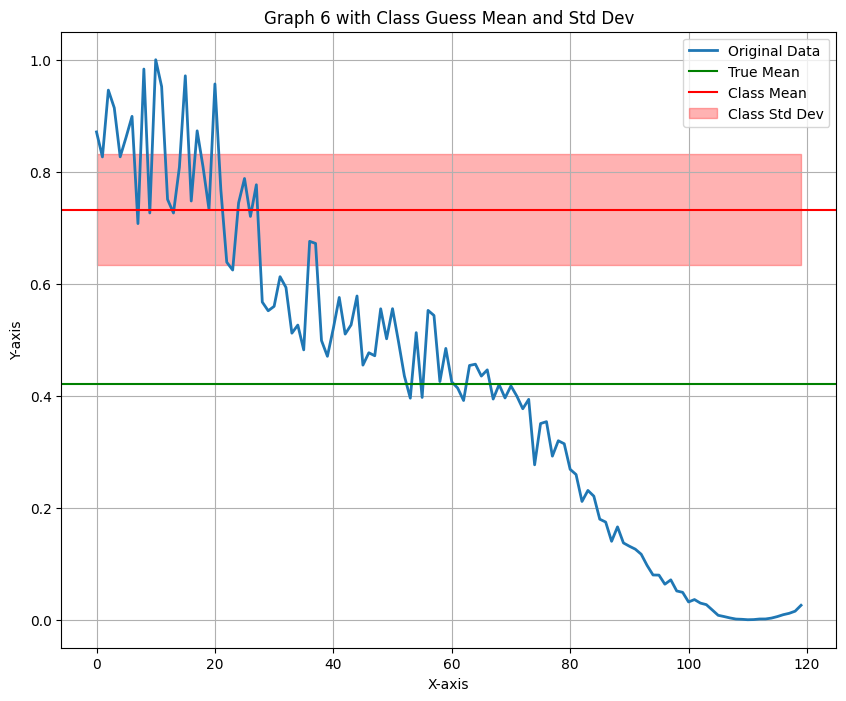

In [29]:
import pandas as pd
import pandas as pd
from pptx import Presentation
from pptx.util import Inches
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor

sheet = gc.open('CS271Responses').sheet1

values = sheet.get_all_values()

students = values[1:]

class_means = []
class_stds = []
for i in range(2, 9):
    guesses = [float(row[i]) for row in students]
    class_means.append(np.mean(guesses))
    class_stds.append(np.std(guesses))


prs = Presentation()

def save_and_add_plot(plt, slide_title, img_path):
    plt.savefig(img_path)
    slide = prs.slides.add_slide(prs.slide_layouts[5])
    title = slide.shapes.title
    title.text = slide_title
    slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))
for graph_index in range(7):
    element = graph_data[graph_index]
    x_values = [point['x'] for point in element['data']]
    y_values = [point['y'] for point in element['data']]

    plt.figure(figsize=(10, 8))
    plt.plot(x_values, y_values, label='Original Data', linewidth=2)

    for student, color in zip(students, colors):
        name = student[1]
        guess = float(student[graph_index + 2])
        plt.axhline(y=guess, color=color)
        plt.text(x_values[-1] + 1, guess, name, color=color, fontsize=9)

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Graph {graph_index} with Individual Guesses')
    plt.grid(True)
    img_path = f'graph_{graph_index}_individual_guesses.png'
    save_and_add_plot(plt, f'Graph {graph_index} with Individual Guesses', img_path)



for graph_index in range(7):
    element = graph_data[graph_index]
    x_values = [point['x'] for point in element['data']]
    y_values = [point['y'] for point in element['data']]

    plt.figure(figsize=(10, 8))
    plt.plot(x_values, y_values, label='Original Data', linewidth=2)
    plt.axhline(y=true_means[graph_index], color='green', label='True Mean')
    plt.axhline(y=class_means[graph_index], color='red', label='Class Mean')
    plt.fill_between(x_values, class_means[graph_index] - class_stds[graph_index], class_means[graph_index] + class_stds[graph_index], color='red', alpha=0.3, label='Class Std Dev')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Graph {graph_index} with Class Guess Mean and Std Dev')
    plt.legend()
    plt.grid(True)
    img_path = f'graph_{graph_index}_class_guess_mean_std_dev.png'

    percent_error = abs((class_means[graph_index] - true_means[graph_index]) / true_means[graph_index]) * 100
    slide_title = f'Graph {graph_index} with Class Guess Mean and Std Dev (Error: {percent_error:.2f}%)'
    save_and_add_plot(plt, slide_title, img_path)

prs.save('CS271_Graphs_Presentation.pptx')
